In [20]:
import numpy as np
import pandas as pd
import torch
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
import matplotlib.cm as cm
import math
import pickle as pkl
import matplotlib.pyplot as plt
# Single methods
from sklearn.preprocessing import MinMaxScaler as Normalizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn import metrics
from sklearn.metrics import silhouette_samples
from Modules.Clustering_Utils_Zamuro import plot_silhouette
from Modules.Clustering_Utils_Zamuro import plot_centroids
from Modules.Clustering_Utils_Zamuro import ClusteringResults
from sklearn.metrics import davies_bouldin_score as DB
from sklearn.metrics import calinski_harabasz_score as CH

import warnings
warnings.filterwarnings("ignore")

import random
def _set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).
 
    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if torch.cuda.is_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
_set_seed(1024)

root = "/home/mirp_ai/Documents/Daniel_Nieto/PhD/AutoEncoders_Ecoacoustics"

## Kmeans UMAP RESULTS

In [33]:
with open(f"temporal_zamuro/zamuro_clustering_results/Kmeans_UMAP/silhouette_n-clusters_33", "rb") as file:
    silhouette = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/Kmeans_UMAP/DB_n-clusters_33", "rb") as file:
    db = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/Kmeans_UMAP/CH_n-clusters_33", "rb") as file:
    ch = pkl.load(file)

silhouette_reshape = [[x] for x in silhouette]
silhouette_norm = Normalizer().fit_transform(silhouette_reshape)
db_reshape = [[x] for x in db]
db_norm = Normalizer().fit_transform(db_reshape)
ch_reshape = [[x] for x in ch]
ch_norm = Normalizer().fit_transform(ch_reshape)


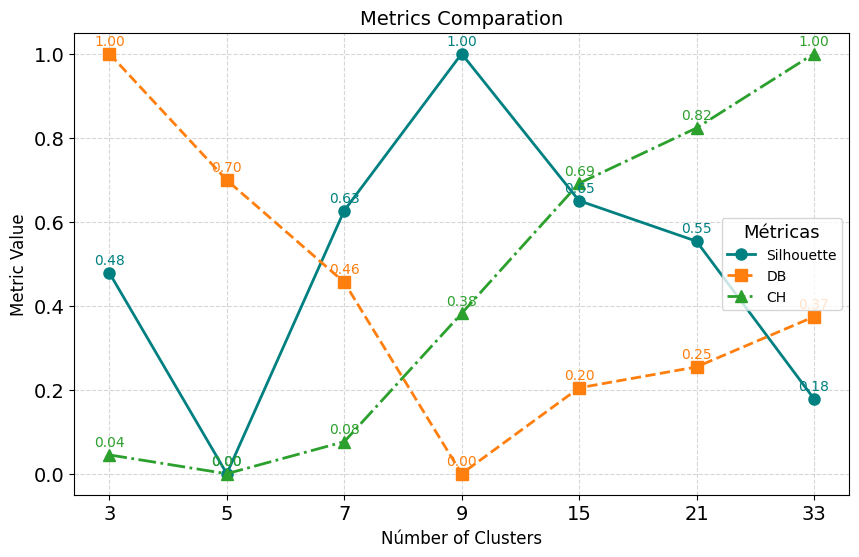

In [58]:
x_labels = [3, 5, 7, 9, 15, 21, 33]
x_indices = range(len(x_labels))

# Definir un esquema de color y estilos
colors = ['teal', '#ff7f0e', '#2ca02c']  # Colores de líneas
markers = ['o', 's', '^']  # Marcadores para cada línea
labels = ['Silhouette', 'DB', 'CH']
line_styles = ['-', '--', '-.']  # Diferentes estilos de línea

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Graficar cada línea con su estilo, color y marcador
for i, y_values in enumerate([silhouette_norm, db_norm, ch_norm]):
    plt.plot(x_indices, y_values, label=labels[i], color=colors[i], linestyle=line_styles[i], marker=markers[i], markersize=8, linewidth=2)
    
    # Añadir el valor de cada punto sobre la línea, convirtiendo cada valor a float
    for j, value in enumerate(y_values):
        plt.text(x_indices[j], value + 0.02, f'{float(value):.2f}', ha='center', color=colors[i])

# Personalizar las etiquetas del gráfico
plt.xlabel("Númber of Clusters", fontsize=12)
plt.ylabel("Metric Value", fontsize=12)
plt.title("Metrics Comparation", fontsize=14)
plt.xticks(x_indices, x_labels)  # Asignar etiquetas personalizadas al eje X
plt.legend(title="Métricas", fontsize=10, title_fontsize='13')
plt.tick_params(axis='both', which='major', labelsize=14)

# Mejorar el fondo y mostrar el gráfico
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Añadir una cuadrícula suave

## Kmeans Pacmap results

In [ ]:
with open(f"temporal_zamuro/zamuro_clustering_results/Kmeans_PacMap/silhouette_n-clusters_33", "rb") as file:
    silhouette = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/Kmeans_PacMap/DB_n-clusters_33", "rb") as file:
    db = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/Kmeans_PacMap/CH_n-clusters_33", "rb") as file:
    ch = pkl.load(file)

silhouette_reshape = [[x] for x in silhouette]
silhouette_norm = Normalizer().fit_transform(silhouette_reshape)
db_reshape = [[x] for x in db]
db_norm = Normalizer().fit_transform(db_reshape)
ch_reshape = [[x] for x in ch]
ch_norm = Normalizer().fit_transform(ch_reshape)

## DBSCAN UMAP Results

In [59]:
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_UMAP/silhouette_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    silhouette = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_UMAP/DB_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    db = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_UMAP/CH_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    ch = pkl.load(file)

silhouette_reshape = [[x] for x in silhouette]
silhouette_norm = Normalizer().fit_transform(silhouette_reshape)
db_reshape = [[x] for x in db]
db_norm = Normalizer().fit_transform(db_reshape)
ch_reshape = [[x] for x in ch]
ch_norm = Normalizer().fit_transform(ch_reshape)

In [46]:
db

[0.9454717934706068,
 0.8443348144466629,
 0.7626718261229847,
 0.6095069474825463,
 0.6781883325803181,
 0.6949384609766133,
 0.7350809078403983]